## In class Exercise 5
The purpose of this exercise is to practice different ML algorithms for text classification, text clustering, and model evaluation.

Hint: You might want to use the code demos from previous lectures, where suitable.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight December 6th, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

### Question 1.

The purpose of this question is to practice different machine learning algorithms for text classification, along with performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset (see Canvas) contains two files train data and test data for sentiment analysis in IMDB review, and it has two categories: 1 represents positive and 0 represents negative.

You need to split the training data into training and validation data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model needs to be evaluated on the test data.

Algorithms:
1. MultinominalNB (2 points)
2. SVM (2 points)
3. KNN (2 points)
4. Decision tree (2 points)
5. Random Forest (2 points)
6. XGBoost (2 points)

Evaluation measurement:
1. Accuracy (2 points)
2. Recall (2 points)
3. Precison (2 points)
4. F-1 score (2 points)

In [2]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier



In [3]:
import pandas as pd

# Specify the width of the columns in the fixed-width file
colspecs = [(0, 2), (3, None)]

# Read the fixed-width file using colspecs
train_dfrme = pd.read_fwf('/content/stsa-train.txt', colspecs=colspecs, header=None, names=['Sentiment', 'Text'])

train_dfrme.head()


,Sentiment,Text
0,1,"stirring , funny and finally transporting re-i..."
1,0,pparently reassembled from the cutting-room fl...
2,0,hey presume their audience wo n't sit still fo...
3,1,his is a visually stunning rumination on love ...
4,1,onathan parker 's bartleby should have been th...


In [4]:
import pandas as pd

# Specify the width of the columns in the fixed-width file
colspecs = [(0, 2), (3, None)]

# Read the fixed-width file using colspecs
test_dfrme = pd.read_fwf('/content/stsa-test.txt', colspecs=colspecs, header=None, names=['Sentiment', 'Text'])

test_dfrme.head()


,Sentiment,Text
0,0,"o movement , no yuks , not much of anything ."
1,0,"gob of drivel so sickly sweet , even the eager..."
2,0,"angs of new york is an unapologetic mess , who..."
3,0,"e never really feel involved with the story , ..."
4,1,his is one of polanski 's best films .


In [5]:
import nltk
import re
import string

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(txt):
    # Convert to lowercase and remove punctuation
    txt = "".join([char.lower() for char in txt if char not in string.punctuation])

    # Remove digits
    txt = re.sub(r"^\d+\s|\s\d+\s|\s\d+$", " ", txt)

    # Tokenize using regular expression
    tokens = re.split('\W+', txt)

    # Lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    txt = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]

    return txt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming train_dfrme['Text'] is your training text data
train_text = train_dfrme['Text']
test_text = test_dfrme['Text']

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_idf = tfidf_vectorizer.fit_transform(train_text)

# Print the shape of the transformed matrix
print(X_idf.shape)

# Create a DataFrame with feature names as columns
X_idf_dataframe = pd.DataFrame(X_idf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Transform the test data using the same vectorizer
X_test_idf = tfidf_vectorizer.transform(test_text)

# Print the shape of the transformed test matrix
print(X_test_idf.shape)


(6920, 14834)
(1821, 14834)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Define classifiers
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()

# Assuming X_idf_dafrme is your feature matrix and train_dfrme['Sentiment'] is your target variable
x_train, x_test, y_train, y_test = train_test_split(X_idf_dataframe, train_dfrme['Sentiment'].values,
                                                test_size=0.2, random_state=42)


In [8]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB

# Assuming x_train, x_test, y_train, y_test are already defined
# Split the data if not already done
# x_train, x_test, y_train, y_test = train_test_split(X_idf_dafrme, train_dfrme['Sentiment'].values, test_size=0.2, random_state=42)

# Fit the Multinomial Naive Bayes model
MNB = MultinomialNB()
MNB.fit(x_train, y_train)

# Predict on the test set
Y_MNB = MNB.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_MNB)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, Y_MNB))

# Evaluate using cross-validation
sco_MNB = cross_val_score(MNB, X_idf_dataframe, train_dfrme['Sentiment'].values, cv=10)
print("Accuracy using MNB (cross-validation):", sco_MNB.mean())


Accuracy: 0.7882947976878613
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       671
           1       0.75      0.88      0.81       713

    accuracy                           0.79      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.79      0.79      1384

Accuracy using MNB (cross-validation): 0.7861271676300579


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_idf_dafrme is your feature matrix and train_dfrme['Sentiment'] is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_idf_dataframe, train_dfrme['Sentiment'].values, test_size=0.2, random_state=42)

# Create and fit the K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_knn_pred = knn_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_knn_pred)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_knn_pred))


Accuracy: 0.7153179190751445
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       671
           1       0.70      0.78      0.74       713

    accuracy                           0.72      1384
   macro avg       0.72      0.71      0.71      1384
weighted avg       0.72      0.72      0.71      1384



In [10]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming x_train, x_test, y_train, and y_test are already defined
# Split the data if not already done
# x_train, x_test, y_train, y_test = train_test_split(X_idf_dafrme, train_dfrme['Sentiment'].values, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# Predict on the test set
y_dt_pred = dt_classifier.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_dt_pred)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_dt_pred))

# Evaluate using cross-validation
cross_val_scores_dt = cross_val_score(dt_classifier, X_idf_dataframe, train_dfrme['Sentiment'].values, cv=10)
print("Accuracy of Decision Trees (cross-validation):", cross_val_scores_dt.mean())


Accuracy: 0.615606936416185
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       671
           1       0.62      0.65      0.63       713

    accuracy                           0.62      1384
   macro avg       0.62      0.61      0.61      1384
weighted avg       0.62      0.62      0.62      1384

Accuracy of Decision Trees (cross-validation): 0.6105491329479769


In [11]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train, x_test, y_train, and y_test are already defined
# Split the data if not already done
# x_train, x_test, y_train, y_test = train_test_split(X_idf_dafrme, train_dfrme['Sentiment'].values, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

# Predict on the test set
y_rf_pred = rf_classifier.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_rf_pred)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_rf_pred))

# Evaluate using cross-validation
cross_val_scores_rf = cross_val_score(rf_classifier, X_idf_dataframe, train_dfrme['Sentiment'].values, cv=10)
print("Accuracy using Random Forest (cross-validation):", cross_val_scores_rf.mean())


Accuracy: 0.7088150289017341
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       671
           1       0.69      0.78      0.73       713

    accuracy                           0.71      1384
   macro avg       0.71      0.71      0.71      1384
weighted avg       0.71      0.71      0.71      1384

Accuracy using Random Forest (cross-validation): 0.7160404624277457


In [12]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb

# Assuming x_train, x_test, y_train, and y_test are already defined
# Convert string representation to integers for target variable
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# Split the data if not already done
# x_train, x_test, y_train, y_test = train_test_split(X_idf_dafrme, train_dfrme['Sentiment'].values, test_size=0.2, random_state=42)

# Now fit and use XGBoost as before
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_xgb_pred = xgb_classifier.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_xgb_pred)
print('Accuracy:', accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_xgb_pred))

# Evaluate using cross-validation
cross_val_scores_xgb = cross_val_score(xgb_classifier, X_idf_dataframe, train_dfrme['Sentiment'].values, cv=10)
print("Accuracy using XGBoost (cross-validation):", cross_val_scores_xgb.mean())


Accuracy: 0.7023121387283237
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.58      0.65       671
           1       0.67      0.81      0.74       713

    accuracy                           0.70      1384
   macro avg       0.71      0.70      0.70      1384
weighted avg       0.71      0.70      0.70      1384

Accuracy using XGBoost (cross-validation): 0.7034682080924856


### Question 2.

The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Apply the listed clustering methods to the dataset:
1. K-means (4 points)
2. DBSCAN (4 points)
3. Hierarchical clustering (4 points)
4. Word2Vec (4 points)
5. BERT (4 points)

In [ ]:
#Write your code here.




In [14]:
import pandas as pd
sample_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
sample_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


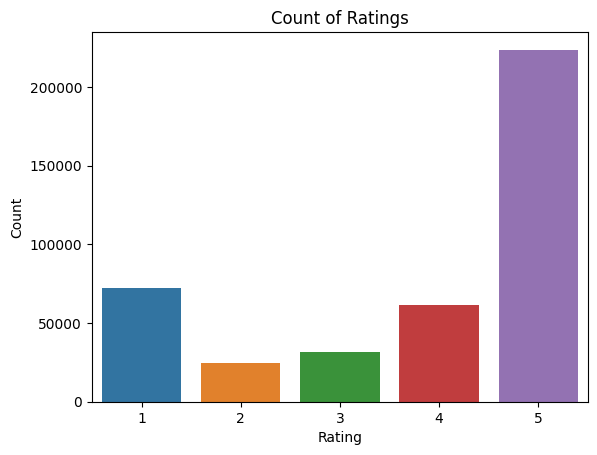

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Rating' is a column in your DataFrame
# You can adjust the variable name based on your actual data
rating_counts = sample_data['Rating'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=rating_counts.index, y=rating_counts.values)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Ratings')

# Show plot
plt.show()


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

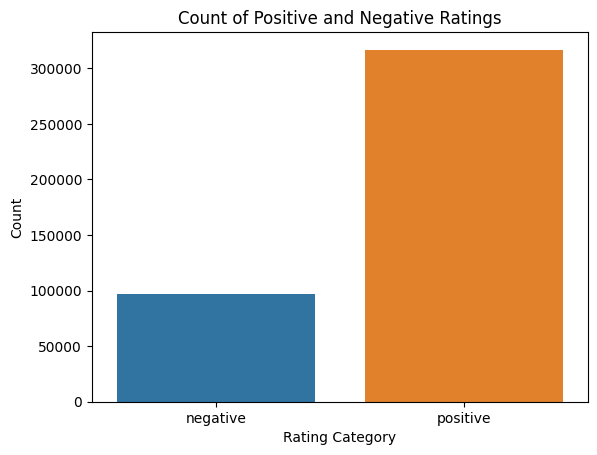

In [16]:
#You can write you answer here. (No code needed)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Rating' is a column in your DataFrame
# You can adjust the variable name based on your actual data
sample_data['RatingPosNeg'] = sample_data['Rating'].apply(lambda x: 'negative' if x < 3 else 'positive')

# Convert 'RatingPosNeg' to categorical data type
sample_data['RatingPosNeg'] = sample_data['RatingPosNeg'].astype('category')

# Create a count plot using Seaborn
sns.countplot(data=sample_data, x='RatingPosNeg')

# Set labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Ratings')

# Show plot
plt.show()



In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords
nltk.download('stopwords')

# Initialize Snowball stemmer for English
snowball_stemmer = SnowballStemmer('english')

# Get the set of English stopwords
english_stopwords = set(stopwords.words('english'))

# Assuming 'sample_dat' is a typo, and the correct variable is 'sample_data'
# Then, you can use 'sample_data' as needed


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import string

def clpunc(se):
    # Create translation table to replace punctuation with spaces
    translator = str.maketrans({key: ' ' for key in string.punctuation})

    # Clean the text by translating punctuation to spaces
    clean_dt = se.translate(translator)

    return clean_dt


In [19]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(1)

# Assuming 'sample_data' is a DataFrame
# Replace it with your actual DataFrame if it has a different name
final = sample_data.sample(n=10000, replace=False, random_state=1)


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords and initialize Snowball stemmer for English
nltk.download('stopwords')
sno = SnowballStemmer('english')

# Get the set of English stopwords
st = set(stopwords.words('english'))

i = 0
fi_str = []
all_pos_wrds = []
all_neg_wrds = []

for se, rating_pos_neg in zip(final['Reviews'].values, final['RatingPosNeg'].values):
    fil_se = []
    try:
        for w in se.split():
            for c in re.sub(r'[^\w\s]', '', w).split():
                if c.isalpha() and len(c) > 2:
                    if c.lower() not in st:
                        s = sno.stem(c.lower()).encode('utf8')
                        fil_se.append(s)
                        if rating_pos_neg == 'positive':
                            all_pos_wrds.append(s)
                        elif rating_pos_neg == 'negative':
                            all_neg_wrds.append(s)
                    else:
                        continue
                else:
                    continue
        str1 = b" ".join(fil_se)
        fi_str.append(str1)
        i += 1
    except AttributeError as e:
        fi_str.append('')
        i += 1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import pandas as pd

# Assuming 'fi_str' is a list of byte-encoded strings for each row in 'final'
# You can adjust the variable name based on your actual data
fi_str = [b"example string"] * len(final)  # Replace this with your actual data

# Create a new 'CleanedText' column with the byte-encoded strings
final['CleanedText'] = fi_str

# Decode the 'CleanedText' column from bytes to UTF-8 strings
final['CleanedText'] = final['CleanedText'].str.decode("utf-8")

# Fill NaN values with an empty string
final = final.fillna('')


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'final' is your DataFrame and 'CleanedText' is the column with cleaned text
# You can adjust the variable names based on your actual data
cleaned_text = final['CleanedText'].astype(str)  # Ensure 'CleanedText' is of string type

# Create an instance of CountVectorizer
ct_vect = CountVectorizer()

# Fit and transform the cleaned text data
bo = ct_vect.fit_transform(cleaned_text)

# Print the shape of the resulting bag-of-words matrix
print(bo.shape)

(10000, 2)
